In [1]:
import argparse
import logging
import os
import pprint
import mxnet as mx
import numpy as np

from rcnn.dataset import *
from rcnn.core import callback, metric
from rcnn.core.loader import AnchorLoader
from rcnn.core.module import MutableModule
from rcnn.utils.load_model import load_param
from rcnn.symbol.symbol_vgg import *
from rcnn.config import config
# set up logger
logging.basicConfig()
logger = logging.getLogger()
logger.setLevel(logging.INFO)

print 'set config'
# setup config
config.TRAIN.BATCH_IMAGES = 1
config.TRAIN.BATCH_ROIS = 128
config.TRAIN.END2END = True
config.TRAIN.BBOX_3D = True
config.TRAIN.BBOX_NORMALIZATION_PRECOMPUTED = True
config.TRAIN.BG_THRESH_LO = 0.0

print 'load symbol'
# load symbol
sym = eval('get_vgg_train')()
feat_sym = sym.get_internals()['rpn_cls_score_output']

ctx=[mx.gpu(4)]
batch_size = len(ctx)
input_batch_size = config.TRAIN.BATCH_IMAGES * batch_size
pprint.pprint(config)
imdb = eval('Kitti')('val', 'data', 'data/kitti')
roidb=imdb.gt_roidb()

train_data = AnchorLoader(feat_sym, roidb, batch_size=input_batch_size, shuffle=True,
                              ctx=ctx, work_load_list=None)
 # infer max shape
max_data_shape = [('data', (input_batch_size, 3, 1000, 1000))]
max_data_shape, max_label_shape = train_data.infer_shape(max_data_shape)
max_data_shape.append(('gt_boxes', (input_batch_size, 100, 5)))
print 'providing maximum shape', max_data_shape, max_label_shape
arg_params, aux_params = load_param('/data01/hustxly/model/faster_rcnn/kitti_ry_cls_input_up_2/ry_alpha_car_only_reg', 20, convert=True)

set config
load symbol
{'ANCHOR_RATIOS': [0.5, 1, 2],
 'ANCHOR_SCALES': [8, 16, 32, 48],
 'EPS': 1e-14,
 'FIXED_PARAMS': ['conv1', 'conv2', 'gamma', 'beta'],
 'FIXED_PARAMS_FINETUNE': ['conv1', 'conv2', 'gamma', 'beta'],
 'IMAGE_STRIDE': 0,
 'INVALID_ORI': -10000,
 'NUM_ANCHORS': 12,
 'NUM_CLASSES': 4,
 'PI': 3.141592653,
 'PIXEL_MEANS': array([[[ 123.68 ,  116.779,  103.939]]]),
 'RCNN_FEAT_SRTIDE': 16,
 'RPN_FEAT_STRIDE': 16,
 'RY_CLASSES': 72,
 'SCALES': [(752, 2500)],
 'TEST': {'BATCH_IMAGES': 1,
          'CXX_PROPOSAL': False,
          'HAS_RPN': False,
          'NMS': 0.3,
          'RPN_MIN_SIZE': 16,
          'RPN_NMS_THRESH': 0.7,
          'RPN_POST_NMS_TOP_N': 300,
          'RPN_PRE_NMS_TOP_N': 6000},
 'TRAIN': {'BATCH_IMAGES': 1,
           'BATCH_ROIS': 128,
           'BATCH_SIZE': 1,
           'BBOX_3D': True,
           'BBOX_INSIDE_WEIGHTS': array([ 1.,  1.,  1.,  1.]),
           'BBOX_MEANS': [0.0, 0.0, 0.0, 0.0],
           'BBOX_NORMALIZATION_PRECOMPUTED': Tr

In [2]:
# infer shape
data_shape_dict = dict(train_data.provide_data + train_data.provide_label)

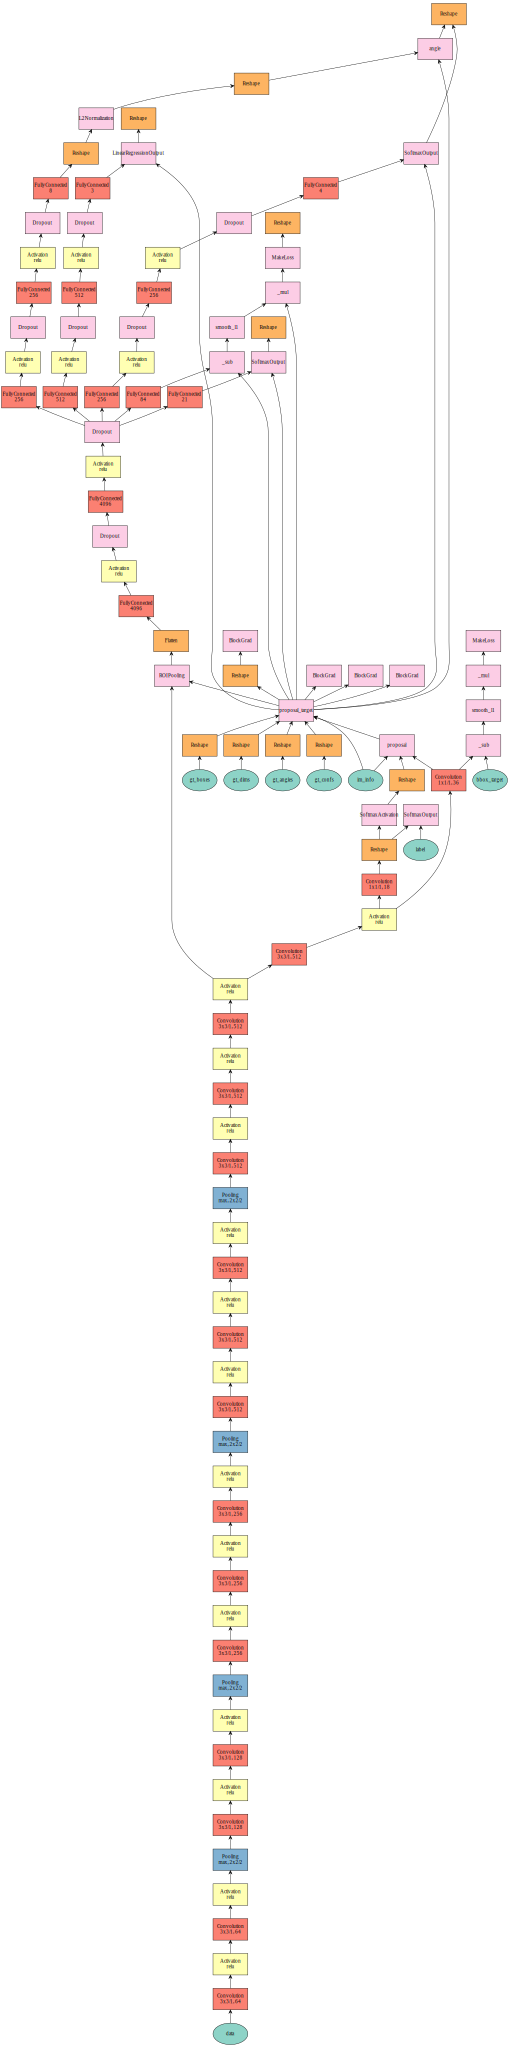

In [5]:
mx.viz.plot_network(sym)

In [3]:
arg_shape, out_shape, aux_shape = sym.infer_shape(**data_shape_dict)
arg_shape_dict = dict(zip(sym.list_arguments(), arg_shape))
out_shape_dict = dict(zip(sym.list_outputs(), out_shape))
aux_shape_dict = dict(zip(sym.list_auxiliary_states(), aux_shape))
print 'output shape'
pprint.pprint(out_shape_dict)
print 'arg shape'
pprint.pprint(arg_shape_dict)
print 'aux shape'
pprint.pprint(aux_shape_dict)

infer_shape error. Arguments:
  bbox_target: (1L, 36L, 47L, 155L)
  im_info: (1L, 3L)
  gt_dims: (1L, 6L, 3L)
  label: (1L, 65565L)
  gt_boxes: (1L, 6L, 5L)
  bbox_weight: (1L, 36L, 47L, 155L)
  gt_confs: (1L, 6L, 1L)
  data: (1L, 3L, 752L, 2482L)
  gt_angles: (1L, 6L)


MXNetError: Error in operator angle: Shape inconsistent, Provided=(128,1), inferred shape=(128,)